### Introduction
#### In this project, we aim to streamline data access and storage by building two reusable components: an <b>AlphaVantageAPI class</b> to interact efficiently with the API and a <b>SQLRepository class</b> to load and extract stock data from a SQLite database. Using <b>Test-Driven Development (TDD)</b>, we’ll integrate assert statements to validate functionality at every step, ensuring robust, scalable, and error-free code that lays a strong foundation for future application development.

In [1]:
%load_ext autoreload
%load_ext sql
%autoreload 2

import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
from config import settings

### Building Our Data Module
##### For our application, we're going to keep all the classes we use to extract, transform, and load data in a single module that we'll call <b>data</b>.

## <b>AlphaVantage API Class</b>

##### To build on our previous GitHub project, <b><i>"Getting Data from APIs,"</i></b> we’ll now enhance the code by organizing it into a reusable class focused on retrieving data from the AlphaVantage API.
##### In the data module, define a class named <b>AlphaVantageAPI</b> with an <b>__init__</b> method that sets your API key as the <b>__api_key</b> attribute. Once completed, import the class and create an instance named <b>av</b>.

In [2]:
# Import `AlphaVantageAPI from data module`
from data import AlphaVantageAPI

# Create instance of `AlphaVantageAPI` class
av = AlphaVantageAPI()

print("av type:", type(av))


av type: <class 'data.AlphaVantageAPI'>


### AlphaVantageAPI: Get_daily Method
##### We will enhance the <b>AlphaVantageAPI</b> class by adding a <b>get_daily</b> method to retrieve daily stock data. Using this new method, we will fetch the stock data for the renewable energy company <b><a href="https://www.suzlon.com/">Suzlon</a></b> and store it in a DataFrame called <b>df_suzlon</b>.

In [3]:
# Define Suzlon ticker symbol
ticker = "SUZLON.BSE"

# Use your `av` object to get daily data
df_suzlon = av.get_daily(ticker=ticker)

print("df_suzlon shape:", df_suzlon.shape)
df_suzlon.head()

df_suzlon shape: (4750, 5)


,open,high,low,close,volume
date,,,,,
2025-01-24,54.99,54.99,52.13,52.56,9310880.0
2025-01-23,55.17,56.61,54.21,54.32,5161131.0
2025-01-22,57.18,57.86,54.58,55.15,5873424.0
2025-01-21,58.26,58.48,56.36,57.45,4473273.0
2025-01-20,57.84,58.76,56.15,58.13,3760910.0


### Next, we will test the newly implemented method to ensure it functions as intended. While tests are typically written prior to developing the method, in this instance, we’ll reverse the process to better understand how assert statements operate.

### AlphaVantageAPI: Testing Get_daily Method
##### To ensure the reliability of the <b>get_daily</b> method, we will implement six key assert statements to validate its output: <br> 1. Confirm that the method returns a DataFrame.<br> 2. Verify the DataFrame contains exactly five columns.<br> 3. Check that the DataFrame utilizes a DatetimeIndex.<br> 4. Ensure the index is appropriately named "date."<br> 5. Validate that the column names are correct.<br> 6. Confirm that all columns have the correct data types.

In [4]:
# Does `get_daily` return a DataFrame?
assert isinstance(df_suzlon, pd.DataFrame)

# Does DataFrame have 5 columns?
assert df_suzlon.shape[1] ==5

# Does DataFrame have a DatetimeIndex?
assert isinstance(df_suzlon.index, pd.DatetimeIndex)

# Is the index name "date"?
assert df_suzlon.index.name =="date"

# Does DataFrame have correct column names?
assert df_suzlon.columns.to_list() == ['open', 'high', 'low', 'close', 'volume']
# OR assert all(df_suzlon.columns == ['open', 'high', 'low', 'close', 'volume'])

# Are columns correct data type?
assert all(df_suzlon.dtypes =="float")

### Great! With the <b>AlphaVantageAPI class</b> now fully prepared to fetch data, our next step is to shift focus to building a class that will allow us to efficiently store this data in our SQLite database.

## <b>SQL Repository Class</b>

##### To ensure efficiency, our application should not rely on fetching data from the AlphaVantage API every time we need to analyze it or build models. Instead, we’ll store the data in a structured database. Given the consistent structure of the DataFrames retrieved from AlphaVantage (with the same five columns), a SQL database is the ideal choice. For this project, we’ll use SQLite, and for uniformity, the database will always have the same name, which we’ve conveniently stored in our <b>config.py</b> module.

### Connect to Database
##### Establish a connection to the database specified in the <b>config.py</b> file for this project. Ensure that the <b>check_same_thread</b> argument is set to <b>False</b> for proper functionality. Assign this connection to the variable <b>connection</b>.

In [6]:
settings.db_name

'stocks.sqlite'

In [5]:
connection = sqlite3.connect(database=settings.db_name, check_same_thread=False)

print("connection type:", type(connection))

connection type: <class 'sqlite3.Connection'>


### With the database connection established, the next step is to design a class that will manage all interactions with the database. For this class, we will take a test-driven approach by creating the tests first before defining the class itself.

### SQLRepository: Write Tests
##### Develop two tests to validate the functionality of the <b>SQLRepository</b> class based on the following criteria:<br> 1. Import the class definition and create an instance of the class.<br> 2. Verify that the instance includes a "connection" attribute.<br> 3. Confirm that the "connection" attribute is of the SQLite <b>Connection</b> type.

In [6]:
# Import class definition
from data import SQLRepository

# Create instance of class
repo = SQLRepository(connection=connection)

# Does `repo` have a "connection" attribute?
assert hasattr(repo, "connection")

# Is the "connection" attribute a SQLite `Connection`?
assert isinstance(repo.connection, sqlite3.Connection)

Create a definition for your `SQLRepository` class. For now, just complete the `__init__` method. Once you're done, use the code you wrote in the previous task to test it.

The next step for the <b>SQLRepository</b> class is to develop a method that enables us to store data. In SQL terms, this is known as <b>inserting</b> tables into the database.

### Write two tests for the SQLRepository class
##### Implement an <b>insert_table</b> method within your SQLRepository class in data module, and run the cell below to validate that it functions correctly:<br> - Does the method return a dictionary?<br> - Are the keys of the dictionary accurate?

In [7]:
hasattr(df_suzlon, "shape")

True

In [8]:
response = repo.insert_table(table_name=ticker, records=df_suzlon, if_exists="replace")

# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct?
assert sorted(list(response.keys())) == ["records_inserted", "transaction_successful"]

If the method passes the assert statements, it confirms that the transaction record is being returned correctly. However, we still need to verify that the data has been successfully added to the database.

Write a SQL query to retrieve the first five rows from the Suzlon data table that was just added to the database.

In [29]:
# Connect to your SQLite database
connection = sqlite3.connect("C:/Users/Jean Paul/Desktop/Mine/Data Science/Projects for Data Science/GitHub Pushes/Reusable Data Pipelines with AlphaVantageAPI and SQLRepository Using Test-Driven Development/stocks.sqlite")
print("Connected to SQLite database successfully")

Connected to SQLite database successfully


In [30]:
# Define your SQL query
query = 'SELECT * FROM "SUZLON.BSE" LIMIT 5'

# Execute the query and load results into a DataFrame
df = pd.read_sql(query, connection)

# Display the DataFrame
df.head()

# Close the connection
#conn.close()


,date,open,high,low,close,volume
0,2025-01-24 00:00:00,54.99,54.99,52.13,52.56,9310880.0
1,2025-01-23 00:00:00,55.17,56.61,54.21,54.32,5161131.0
2,2025-01-22 00:00:00,57.18,57.86,54.58,55.15,5873424.0
3,2025-01-21 00:00:00,58.26,58.48,56.36,57.45,4473273.0
4,2025-01-20 00:00:00,57.84,58.76,56.15,58.13,3760910.0


We can successfully insert data into our database, but it's equally important to focus on reading data from it. Since reading is a bit more complex than inserting, we’ll begin by drafting the necessary code in this notebook before integrating it into the SQLRepository class.

First, we'll write a SQL query to retrieve all the Suzlon data. Then, we'll use pandas to fetch the data from the database and load it into a DataFrame named df_suzlon_test.

In [36]:
# Define your SQL query
query = "SELECT * FROM 'SUZLON.BSE'"

df_suzlon_test = pd.read_sql(sql=query, con=connection, parse_dates=["date"], index_col="date")

print(df_suzlon_test.info())
df_suzlon_test.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4750 entries, 2025-01-24 to 2005-10-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4750 non-null   float64
 1   high    4750 non-null   float64
 2   low     4750 non-null   float64
 3   close   4750 non-null   float64
 4   volume  4750 non-null   float64
dtypes: float64(5)
memory usage: 222.7 KB
None


,open,high,low,close,volume
date,,,,,
2025-01-24,54.99,54.99,52.13,52.56,9310880.0
2025-01-23,55.17,56.61,54.21,54.32,5161131.0
2025-01-22,57.18,57.86,54.58,55.15,5873424.0
2025-01-21,58.26,58.48,56.36,57.45,4473273.0
2025-01-20,57.84,58.76,56.15,58.13,3760910.0


Now that we’ve learned how to read a table from our database, the next step is to transform our code into a well-structured function. However, since we’re following a backward design approach, we’ll begin by writing our tests first.

Below are the assert statements designed to validate the read_table function. Each comment outlines the specific check being performed:

-Assign the output of the read_table function to the variable df_suzlon.

-Verify that df_suzlon is a valid DataFrame.

-Ensure the DataFrame uses a DatetimeIndex.

-Confirm that the index is correctly labeled as "date".

-Check that the DataFrame contains exactly 2,500 rows and 5 columns.

-Validate that the column names are as expected.

-Confirm that all column data types are correct.

In [39]:
# Assign `read_table` output to `df_suzlon`
df_suzlon = read_table(table_name="SUZLON.BSE", limit=2500)  # noQA F821

# Is `df_suzlon` a DataFrame?
assert isinstance(df_suzlon, pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_suzlon.index, pd.DatetimeIndex)

# Is the index named "date"?
assert df_suzlon.index.name == "date"

# Does it have 2,500 rows and 5 columns?
assert df_suzlon.shape == (2500, 5)

# Are the column names correct?
assert df_suzlon.columns.to_list() == ['open', 'high', 'low', 'close', 'volume']

# Are the column data types correct?
assert all(df_suzlon.dtypes == float)
# OR assert all(df_suzlon.dtypes == "float")


# Print `df_suzlon` info
print("df_suzlon shape:", df_suzlon.shape)
print()
print(df_suzlon.info())
df_suzlon.head()

df_suzlon shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2025-01-24 to 2014-12-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2025-01-24,54.99,54.99,52.13,52.56,9310880.0
2025-01-23,55.17,56.61,54.21,54.32,5161131.0
2025-01-22,57.18,57.86,54.58,55.15,5873424.0
2025-01-21,58.26,58.48,56.36,57.45,4473273.0
2025-01-20,57.84,58.76,56.15,58.13,3760910.0


Build upon the code you've previously written to complete the read_table function outlined below. 
.Purpose: Reads a specific table from the database.

.Parameters:

   -table_name: The name of the table in the SQLite database to query.

   -limit (optional): Specifies the number of most recent records to retrieve. If not provided, all records will be fetched.
       
.Returns:
        
   -A DataFrame with:

     *A DatetimeIndex labeled "date".
         
     *Numeric columns: 'open', 'high', 'low', 'close', and 'volume'.

In [38]:
def read_table(table_name, limit=None):

    # Create SQL query (with optional limit)
    if limit:
        sql= f"SELECT * FROM '{table_name}' LIMIT {limit}"
    else:
        sql= f"SELECT * FROM '{table_name}'"

    # Retrieve data, read into DataFrame
    df = pd.read_sql(sql=sql, con=connection, parse_dates=["date"], index_col="date")

    # Return DataFrame
    return df


Convert the `read_table` function into a method within the `SQLRepository` class. Then, revisit the previous task and update the code to ensure you're testing the class method rather than the standalone function written in the notebook.

In [40]:
# Assign `read_table` output to `df_suzlon`
df_suzlon = repo.read_table(table_name="SUZLON.BSE", limit=2500)

# Validate the DataFrame
assert isinstance(df_suzlon, pd.DataFrame)
assert isinstance(df_suzlon.index, pd.DatetimeIndex)
assert df_suzlon.index.name == "date"
assert df_suzlon.shape == (2500, 5)
assert df_suzlon.columns.to_list() == ['open', 'high', 'low', 'close', 'volume']
assert all(df_suzlon.dtypes == float)

# Print `df_suzlon` info
print("df_suzlon shape:", df_suzlon.shape)
print()
print(df_suzlon.info())
df_suzlon.head()

df_suzlon shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2025-01-24 to 2014-12-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2025-01-24,54.99,54.99,52.13,52.56,9310880.0
2025-01-23,55.17,56.61,54.21,54.32,5161131.0
2025-01-22,57.18,57.86,54.58,55.15,5873424.0
2025-01-21,58.26,58.48,56.36,57.45,4473273.0
2025-01-20,57.84,58.76,56.15,58.13,3760910.0


Great! We've successfully set up everything needed to retrieve data from AlphaVantage, store it in our database, and retrieve it whenever required. Now, let's move on to some exploratory analysis to compare the stock performance of the two companies in our dataset.

## Comparing Stock Returns

We currently have Suzlon Energy's data stored in our database, but to proceed with comparing the two stocks, we need to include the data for Ambuja Cement as well.

To proceed, use the instances of the **AlphaVantageAPI** (`av`) and **SQLRepository** (`repo`) classes that were set up earlier in this lesson. These tools will enable us to retrieve the stock data for **Ambuja Cement** directly from AlphaVantage and seamlessly store it in our database for future analysis.

In [42]:
ticker = "AMBUJACEM.BSE"

# Get Ambuja data using `av`
ambuja_records = av.get_daily(ticker=ticker)

# Insert `ambuja_records` database using `repo`
response = repo.insert_table(table_name=ticker, records=ambuja_records, if_exists="replace")

response

{'transaction_successful': True, 'records_inserted': 4942}

In [43]:
ambuja_records.shape

(4942, 5)

Let’s review the data to ensure it aligns with our requirements.

**Insert Ambuja Data into Database**<br>
Using the **read_table** method integrated into the **SQLRepository** class, retrieve the most recent 2,500 rows of data for **Ambuja Cement** from the database. Assign the resulting data to **df_ambuja** for further analysis.

In [44]:
ticker = "AMBUJACEM.BSE"
df_ambuja = repo.read_table(table_name=ticker, limit=2500)

print("df_ambuja type:", type(df_ambuja))
print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja type: <class 'pandas.core.frame.DataFrame'>
df_ambuja shape: (2500, 5)


,open,high,low,close,volume
date,,,,,
2025-01-24,547.95,562.0,547.75,552.05,138842.0
2025-01-23,535.05,552.1,530.75,547.75,115606.0
2025-01-22,534.55,538.6,527.00,537.05,33196.0
2025-01-21,536.95,548.5,530.55,531.60,41152.0
2025-01-20,537.40,539.0,530.10,534.45,18346.0


We've spent a lot of time so far looking at this data, but what does it actually represent? It turns out the stock market is a lot like any other market: people buy and sell goods. The prices of those goods can go up or down depending on factors like supply and demand. In the case of a stock market, the goods being sold are stocks (also called equities or securities), which represent an ownership stake in a corporation.

During each trading day, the price of a stock will change, so when we're looking at whether a stock might be a good investment, we look at four types of numbers: open, high, low, close, volume. **Open** is exactly what it sounds like: the selling price of a share when the market opens for the day. Similarly, **close** is the selling price of a share when the market closes at the end of the day, and **high** and **low** are the respective maximum and minimum prices of a share over the course of the day. **Volume** is the number of shares of a given stock that have been bought and sold that day. Generally speaking, a firm whose shares have seen a high volume of trading will see more price variation of the course of the day than a firm whose shares have been more lightly traded.

Let's visualize how the price of Ambuja Cement changes over the last decade.

Visualize the closing price from **df_ambuja** by creating a plot. Ensure the chart includes clearly labeled axes

**Plot Ambuja Closing Price**

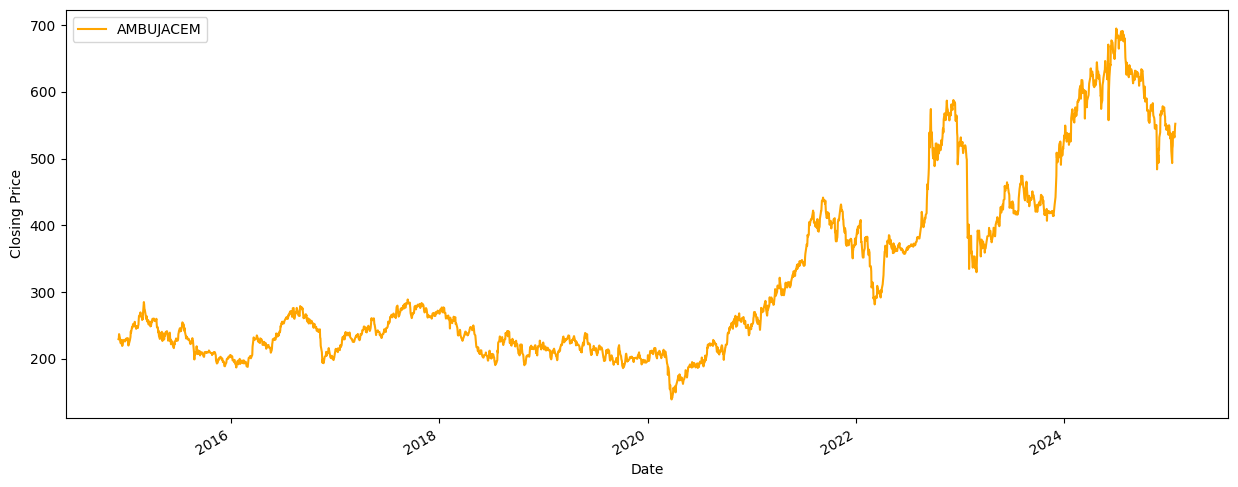

In [46]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ambuja` closing price
df_ambuja["close"].plot(ax=ax, label="AMBUJACEM", color="orange") # or color="C1"


# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")

# Add legend
plt.legend();

Let's add the closing price of Suzlon to our graph so we can compare the two.

 Create a plot that shows the closing prices of **df_suzlon** and **df_ambuja**. Again, label your axes and include a legend.

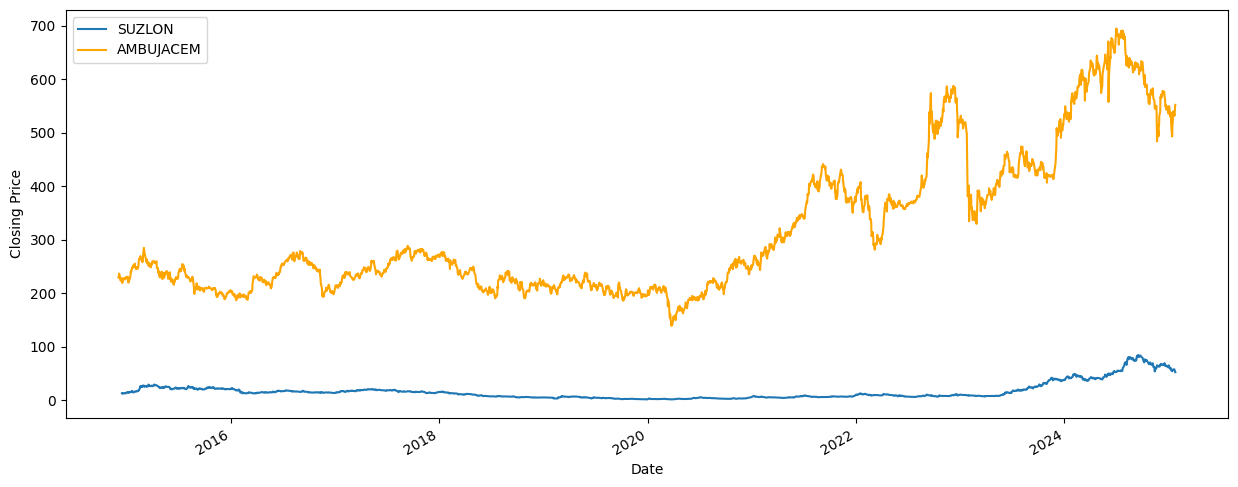

In [47]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_suzlon` and `df_ambuja`
df_suzlon["close"].plot(ax=ax, label="SUZLON") # or color="C0 by default"
df_ambuja["close"].plot(ax=ax, label="AMBUJACEM", color="orange")

# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")

# Add legend
plt.legend();

Looking at this plot, we might conclude that Ambuja Cement is a "better" stock than Suzlon energy because its price is higher. But price is just one factor that an investor must consider when creating an investment strategy. What is definitely true is that it's hard to do a head-to-head comparison of these two stocks because there's such a large price difference.

One way in which investors compare stocks is by looking at their **returns** instead. A return is the change in value in an investment, represented as a percentage. So let's look at the daily returns for our two stocks.

Enhance **df_ambuja** by adding a new column called **"return"**, which calculates the daily percentage change in the **"close"** column. This will allow us to track how the closing price fluctuates from one day to the next, providing key insights into the stock's performance.

<div class="alert alert-info" role="alert">
    <p><b>Tip:</b> Our two DataFrames are sorted <b>descending</b> by date, but you'll need to make sure they're sorted <b>ascending</b> in order to calculate their returns.</p>
</div>

In [48]:
# Sort DataFrame ascending by date
df_ambuja.sort_index(ascending=True, inplace=True)

# Create "return" column
df_ambuja["return"]= df_ambuja["close"].pct_change() * 100

print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja shape: (2500, 6)


,open,high,low,close,volume,return
date,,,,,,
2014-12-03,228.60,230.95,227.05,229.45,79452.0,NaN
2014-12-04,230.90,231.15,227.35,229.95,117157.0,0.217912
2014-12-05,227.00,237.70,227.00,236.95,217721.0,3.044140
2014-12-08,239.00,239.75,215.00,231.25,246418.0,-2.405571
2014-12-09,230.85,231.05,225.00,226.05,137064.0,-2.248649


Add a **"return"** column to **df_suzlon**, which will calculate the daily percentage change in the **"close"** column. This will help us understand how the stock price of Suzlon Energy changes on a day-to-day basis.

In [49]:
# Sort DataFrame ascending by date
df_suzlon.sort_index(ascending=True, inplace=True)

# Create "return" column
df_suzlon["return"]= df_suzlon["close"].pct_change() * 100

print("df_suzlon shape:", df_suzlon.shape)
df_suzlon.head()

df_suzlon shape: (2500, 6)


,open,high,low,close,volume,return
date,,,,,,
2014-12-15,13.28,13.65,13.05,13.15,2810563.0,NaN
2014-12-16,13.05,13.50,12.15,12.93,5586065.0,-1.673004
2014-12-17,12.94,13.07,12.30,12.48,3832723.0,-3.480278
2014-12-18,12.70,13.30,12.70,12.98,2738284.0,4.006410
2014-12-19,13.20,13.39,12.52,12.77,3144133.0,-1.617874


Let's now visualize the returns for both companies and compare their performance.

**Compare Ambuja and Suzlon Returns**

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot returns for `df_suzlon` and `df_ambuja`
df_suzlon["return"].plot(ax=ax, label="SUZLON") 
df_ambuja["return"].plot(ax=ax, label="AMBUJACEM", color="C1")

# Label axes
plt.xlabel("Date")
plt.ylabel("Daily Return")

# Add legend
plt.legend();

Success! By representing returns as a percentage, we're able to compare two stocks that have very different prices. But what is this visualization telling us? We can see that the returns for Suzlon have a wider spread. We see big gains and big losses. In contrast, the spread for Ambuja is narrower, meaning that the price doesn't fluctuate as much. 

Another name for this day-to-day fluctuation in returns is called [**volatility**](https://en.wikipedia.org/wiki/Volatility_(finance)), which is another important factor for investors. 